## GLOVE VEC (PRE TRAINED)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import gensim
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import pickle

### Loading Dataset

In [2]:
data = pd.read_csv('C:/Users/Muzammil/Desktop/TA_Assignment_1/TA_Data_Collection/sentences.csv')
data.shape

(3328, 2)

In [3]:
data.tail()

,sentence,Text
3323,"India’s forex reserves increase, stand at $562...",MUMBAI: India’s foreign exchange reserves rose...
3324,"Ford to cut 1,100 jobs in Spain","MADRID: U.S. auto maker Ford plans to slash 1,..."
3325,Sri Lankan shares snap 6-day rally as financia...,"Sri Lankan shares closed lower on Friday, afte..."
3326,"NY cocoa to fall to $2,692",SINGAPORE: New York May cocoa is expected to b...
3327,Banks drag FTSE 100 to 1-month low,London’s blue-chip FTSE 100 index fell on Frid...


### Loading Glove Model

In [4]:
model = KeyedVectors.load('C:/Users/Muzammil/Desktop/TA_Assignment_1/TA_Glove_model/Glove_model.bin')

In [5]:
model.vector_size

300

In [7]:
## function to create sentence embedding

def sentence_embedding(data):
    words = data.split()
    embedding = np.zeros(300)
    count = 0
    for word in words:
        if word in model.index_to_key:
            embedding += model[word]
            count += 1
    if count > 0:
        embedding /= count
    return embedding

Creating sentence embedding and appending it to corpus

In [8]:
corpus = []

for i in data['sentence']:
    corpus.append(sentence_embedding(i))

In [12]:
np.array(corpus).shape

(3328, 300)

In [13]:
print(np.array(corpus))

[[-0.12579225 -0.01002575  0.1033455  ... -0.094915   -0.29876249
   0.3448475 ]
 [ 0.03897131 -0.01690422  0.3134898  ...  0.0181918  -0.25318399
   0.03380242]
 [ 0.15033751 -0.010001    0.3406494  ...  0.0552118  -0.12782325
   0.19020262]
 ...
 [ 0.1401135   0.16973584  0.11935838 ... -0.39242137 -0.00759975
   0.05381563]
 [-0.16637003 -0.30132424  0.25365612 ...  0.0495435   0.05614249
  -0.1857775 ]
 [ 0.0662974  -0.12905279 -0.2571224  ...  0.2159392  -0.00709399
   0.0355028 ]]


In [14]:
input_data = "tribut pour veteran actor muham qavi khan"

input_corpus  = sentence_embedding(input_data)

In [15]:
input_corpus=input_corpus.reshape(1,300)

In [16]:
np.array(input_corpus).shape

(1, 300)

### Cosine Similarity

In [17]:
cos_similarities = cosine_similarity(np.array(input_corpus) , np.array(corpus))
print(cos_similarities)
print(cos_similarities.max())
print(cos_similarities[0].argmax())
print(cos_similarities[0].max())
s= cos_similarities[0].argsort()[-5:][::-1]
print(s)

[[0.38741748 0.41718396 0.40425401 ... 0.37767431 0.36282611 0.36958363]]
0.7267064999277155
909
0.7267064999277155
[ 909 1079  814  536  535]


In [18]:
for i in s:
    print(data.sentence[i])

Tributes pour in for veteran actor Muhammed Qavi Khan
Tributes pour in for veteran actor Muhammed Qavi Khan
Sanjrani mourns legendary actor Qavi Khan’s demise
Stars pay tribute to the ‘institution’ that was veteran actor Qavi Khan
Stars pay tribute to the ‘institution’ that was veteran actor Qavi Khan


## Clustering

### K Mean Clustering

In [19]:
#use pca to reduce dimensionality
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(corpus)

Silhouette score: 0.3802996689983275


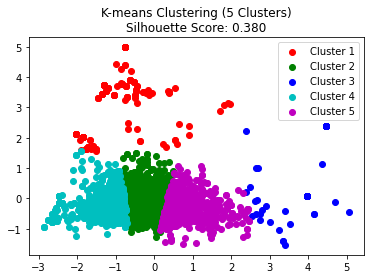

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[kmeans.labels_ == i, 0], reduced_matrix[kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Mini Batch K Mean 

Silhouette score: 0.36559468176694515


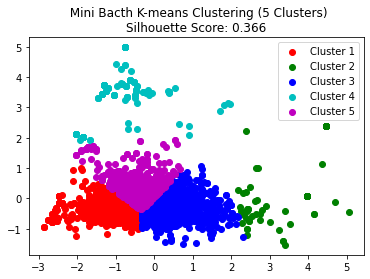

In [21]:
mini_kmeans = MiniBatchKMeans(n_clusters=5)
mini_kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, mini_kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[mini_kmeans.labels_ == i, 0], reduced_matrix[mini_kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f" Mini Bacth K-means Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Agglomarative Clustering

Silhouette score: 0.2899086288822051


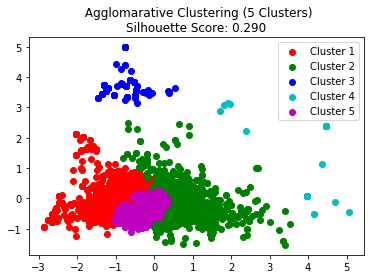

In [22]:
aglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
aglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, aglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[aglo.labels_ == i, 0], reduced_matrix[aglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f" Agglomarative Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()